In [1]:
!pip install tensorflow-gpu

In [2]:
import tensorflow as tf
import os
import numpy as np
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import classification_report,confusion_matrix
from keras.preprocessing import image

In [3]:
#Train directory
train_dir = os.path.join("C:/Users/vikki/Desktop/leaf/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train")
#Test directory
test_dir = os.path.join("C:/Users/vikki/Desktop/leaf/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid")

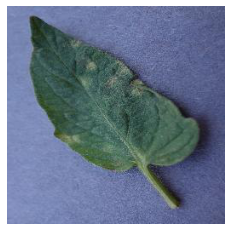

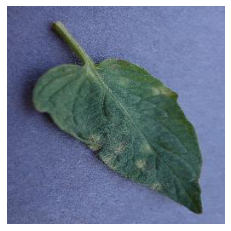

In [4]:
#Directory for plotting sample images
tomato_files = os.path.join("C:/Users/vikki/Desktop/leaf/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold")
#Listing all the images from directory
tomato_image = os.listdir(tomato_files)
pic_index = 20
next_plant = [os.path.join(tomato_files, fname) for fname in tomato_image[pic_index-2:pic_index]]
for i, img_path in enumerate(next_plant):
  img= mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

In [5]:
# Data Augmentation
# Global Variables
IMG_WIDTH = 224 #Width of image
IMG_HEIGHT = 224 # Height of Image
BATCH_SIZE = 32 # Batch Size 
train_data_size = 22279 #
test_data_size = 5569
train_data = ImageDataGenerator(
                rescale = 1./255, #normalizing the input image
                rotation_range = 0.2,
                zoom_range = 0.2,
                vertical_flip=True,
                fill_mode='nearest')
test_data = ImageDataGenerator(
                rescale = 1./255)
train_set = train_data.flow_from_directory(
                train_dir,
                target_size=(IMG_WIDTH,IMG_HEIGHT),
                batch_size=BATCH_SIZE,
                class_mode = 'categorical')
test_set = test_data.flow_from_directory(
                test_dir,
                target_size = (IMG_WIDTH,IMG_HEIGHT),
                batch_size = BATCH_SIZE,
                shuffle=False,
                class_mode = 'categorical')

Found 38760 images belonging to 38 classes.
Found 7752 images belonging to 38 classes.


In [6]:
labels_values,no_of_images = np.unique(train_set.classes,return_counts = True)
dict(zip(train_set.class_indices,no_of_images))
labels = test_set.class_indices
labels = { v:k for k,v in labels.items() } # Flipping keys and values
values_lbl = list(labels.values()) # Taking out only values from dictionary

In [7]:
# Importing Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

# Initializing the CNN
model = Sequential()

# Convolution Step 1
model.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(224, 224, 3), activation = 'relu'))

# Max Pooling Step 1
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
model.add(BatchNormalization())

# Convolution Step 2
model.add(Convolution2D(256, 11, strides = (1, 1), padding='valid', activation = 'relu'))

# Max Pooling Step 2
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding='valid'))
model.add(BatchNormalization())

# Convolution Step 3
model.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
model.add(BatchNormalization())

# Convolution Step 4
model.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
model.add(BatchNormalization())

# Convolution Step 5
model.add(Convolution2D(256, 3, strides=(1,1), padding='valid', activation = 'relu'))

# Max Pooling Step 3
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
model.add(BatchNormalization())

# Flattening Step
model.add(Flatten())

# Full Connection Step
model.add(Dense(units = 4096, activation = 'relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(units = 4096, activation = 'relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(units = 1000, activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(units = 38, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 256)         1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 384)         8

In [8]:
# Compiling the Model
from keras import optimizers
model.compile(optimizer=optimizers.SGD(lr=0.1, momentum=0.9, decay=0.005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
history_model = model.fit_generator(train_set,steps_per_epoch = train_data_size // BATCH_SIZE+1,epochs=20,
validation_data=test_set,validation_steps = test_data_size // BATCH_SIZE+1,verbose=1,
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience = 0)])

Epoch 1/20
697/697 [==============================] - 1868s 3s/step - loss: 1.6344 - accuracy: 0.4929 - val_loss: 1.3771 - val_accuracy: 0.5704
Epoch 2/20
697/697 [==============================] - 1878s 3s/step - loss: 1.6013 - accuracy: 0.5000 - val_loss: 1.6025 - val_accuracy: 0.5221
Epoch 3/20
697/697 [==============================] - 1875s 3s/step - loss: 1.5650 - accuracy: 0.5124 - val_loss: 1.3253 - val_accuracy: 0.5993
Epoch 4/20
697/697 [==============================] - 2014s 3s/step - loss: 1.5334 - accuracy: 0.5152 - val_loss: 1.7167 - val_accuracy: 0.5246
Epoch 5/20
697/697 [==============================] - 1995s 3s/step - loss: 1.4954 - accuracy: 0.5312 - val_loss: 1.2690 - val_accuracy: 0.6066
Epoch 6/20
697/697 [==============================] - 1876s 3s/step - loss: 1.4864 - accuracy: 0.5341 - val_loss: 1.2696 - val_accuracy: 0.6182
Epoch 7/20
697/697 [==============================] - 1882s 3s/step - loss: 1.4619 - accuracy: 0.5401 - val_loss: 3.2978 - val_accuracy:

Label: Potato___Early_blight
Accuracy: 97.05899357795715


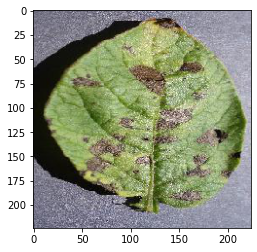

In [21]:
img = image.load_img('C:/Users/vikki/Desktop/leaf/test/test/PotatoEarlyBlight2.JPG',target_size=(224,224,3))
img = image.img_to_array(img)
img = img/255
proba = model.predict(img.reshape(1,224,224,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(1):
    print("Label: {}".format(labels[top_3[i]]))
    print("Accuracy: {:2}".format(proba[0][top_3[i]]*100))
    plt.imshow(img)

Label: Tomato___Tomato_Yellow_Leaf_Curl_Virus
Accuracy: 30.77501952648163


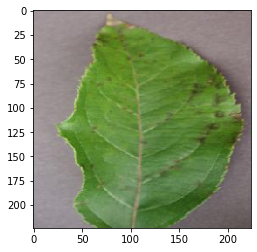

In [22]:
img = image.load_img('C:/Users/vikki/Desktop/leaf/test/test/AppleScab1.JPG',target_size=(224,224,3))
img = image.img_to_array(img)
img = img/255
proba = model.predict(img.reshape(1,224,224,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(1):
    print("Label: {}".format(labels[top_3[i]]))
    print("Accuracy: {:2}".format(proba[0][top_3[i]]*100))
    plt.imshow(img)

Label: Potato___healthy
Accuracy: 58.41948986053467


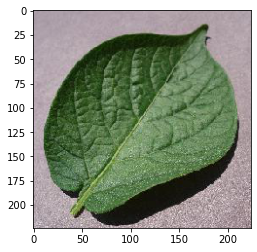

In [25]:
img = image.load_img('C:/Users/vikki/Desktop/leaf/test/test/PotatoHealthy2.JPG',target_size=(224,224,3))
img = image.img_to_array(img)
img = img/255
proba = model.predict(img.reshape(1,224,224,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(1):
    print("Label: {}".format(labels[top_3[i]]))
    print("Accuracy: {:2}".format(proba[0][top_3[i]]*100))
    plt.imshow(img)

Label: Tomato___Tomato_Yellow_Leaf_Curl_Virus
Accuracy: 80.186927318573


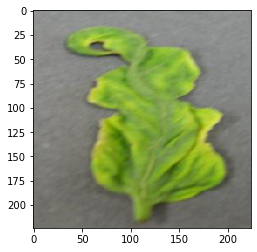

In [26]:
img = image.load_img('C:/Users/vikki/Desktop/leaf/test/test/TomatoYellowCurlVirus5.JPG',target_size=(224,224,3))
img = image.img_to_array(img)
img = img/255
proba = model.predict(img.reshape(1,224,224,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(1):
    print("Label: {}".format(labels[top_3[i]]))
    print("Accuracy: {:2}".format(proba[0][top_3[i]]*100))
    plt.imshow(img)

Label: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Accuracy: 58.58293175697327


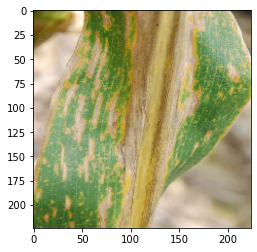

In [43]:
img = image.load_img('C:/Users/vikki/Desktop/leaf/test/test/OIP.jfif',target_size=(224,224,3))
img = image.img_to_array(img)
img = img/255
proba = model.predict(img.reshape(1,224,224,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(1):
    print("Label: {}".format(labels[top_3[i]]))
    print("Accuracy: {:2}".format(proba[0][top_3[i]]*100))
    plt.imshow(img)

In [44]:
import matplotlib.pyplot as plt

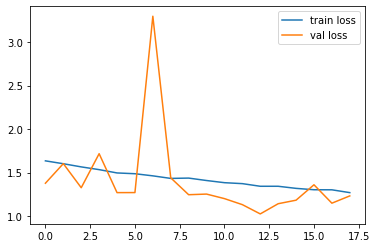

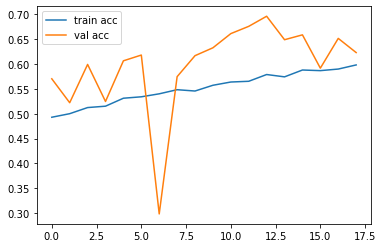

<Figure size 432x288 with 0 Axes>

In [45]:
# plot the loss
plt.plot(history_model.history['loss'], label='train loss')
plt.plot(history_model.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history_model.history['accuracy'], label='train acc')
plt.plot(history_model.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [47]:
y_test = test_set.classes

In [57]:
#predicting our model with test dataset i.e. unseen dataset
pred =model.predict_generator(test_set,verbose=1,).argmax(axis=1)

243/243 [==============================] - 157s 645ms/step


In [58]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.42      0.09      0.15       204
           1       0.33      0.22      0.27       204
           2       0.57      0.50      0.53       204
           3       0.63      0.45      0.52       204
           4       0.75      0.52      0.62       204
           5       0.52      0.47      0.49       204
           6       0.82      0.83      0.83       204
           7       0.64      0.63      0.63       204
           8       0.86      0.85      0.85       204
           9       0.83      0.59      0.69       204
          10       0.94      0.86      0.90       204
          11       0.65      0.39      0.48       204
          12       0.60      0.81      0.69       204
          13       0.59      0.84      0.69       204
          14       0.86      0.73      0.79       204
          15       0.91      0.66      0.76       204
          16       0.92      0.51      0.66       204
          17       0.90    

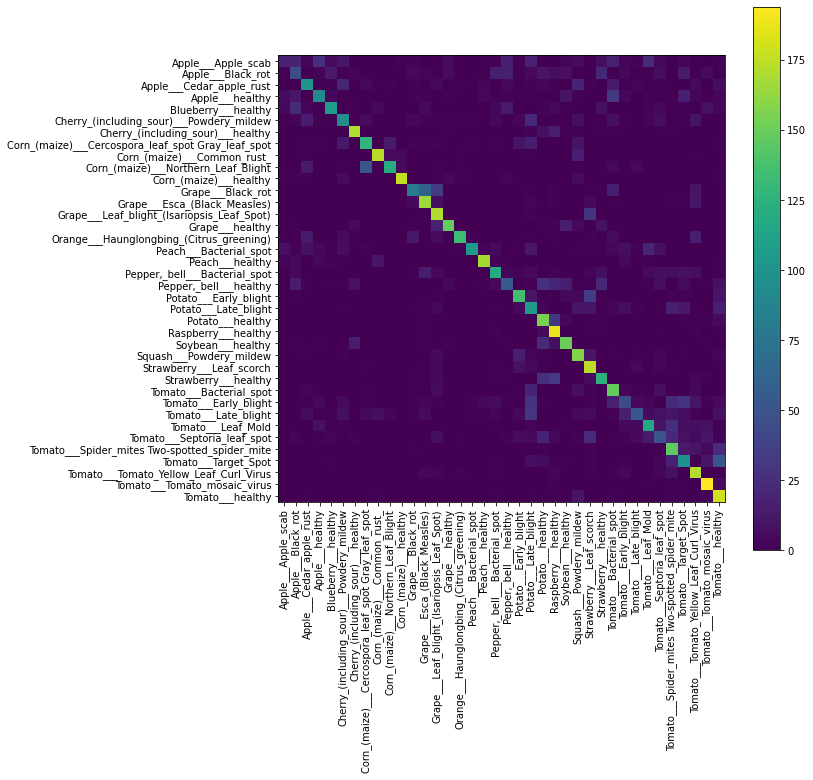

In [60]:
conf = confusion_matrix(y_test,pred)
plt.figure(figsize=(10,10))
plt.imshow(conf, interpolation='nearest')
plt.colorbar()
plot_mark = np.arange(len(values_lbl))
_ = plt.xticks(plot_mark, values_lbl, rotation=90)
_ = plt.yticks(plot_mark, values_lbl)